In [1]:
# Option 2: Image Analytics  

# Write a simple app/script that will take a LinkedIN profile URL as an input, and, perform the following changes and analysis on the LinkedIn profile photo, such as :  

# Blur the background from the face  

# Identify profiles where the face is at least 50-60% of the overall photo. If it's less than 50%, then score of face quality being too small  

# Identify if teeth are visible. If so, mention teeth is shown  

# Identity sentiment on face. E.g. smiling / happy, or neutral, sad.

# Other considerations:  

# Use native SDK or Rest calls (Microsoft Computer Vision API),  

# Perform visual features recognition.



from PIL import Image                        #Image manipulation library
import urllib.request                        #library to open URLs
import io                                    #provides the Python interfaces to stream handling
import requests                              #library to send all HTTP requests
from PIL import ImageFilter                  #Image Editing library
import cv2                                   #computer vision library                        
import matplotlib.pyplot as plt              # library makes python works as MATLAB
import json                                  #integrated Json response
from selenium import webdriver               # automating tool for  web application testing
from webdriver_manager.chrome import ChromeDriverManager  #Chrome Driver Manager 
from selenium.webdriver.common.keys import Keys           #library allows access to keyboard functions
from getpass import getpass                  #encryptes passwords




#This method loads the image URL of entered linkedIn profile 
def load_image():
    linkedin_url=input(" Enter Linkedin profile")                 #asks user to enter linkedin profile URL
    username=input("enter address")                               # Enter valid linkedin username
    password=getpass("enter password")                            #enter valid linkedin password
    driver = webdriver.Chrome(ChromeDriverManager().install())    #stores ChromeDriverManager() in driver and opens Google Chrome for scrapping





    driver.get('https://www.google.com')                            # driver.get method() will navigate to a page given by the URL address
    search_box = driver.find_element_by_css_selector('input.gLFyf') 
    
    #search linkedIn url on Google
    search_box.send_keys(linkedin_url)                              
    search_box.send_keys(Keys.ENTER)
    
    
    linkedin_button1 = driver.find_element_by_xpath("//h3[contains(@class, 'LC20lb DKV0Md')]")  #opens the linkedin URL
    linkedin_button1.click()
    
    driver.implicitly_wait(20)
    driver.find_element_by_link_text("Sign in").click()


#enters linkedIn username and password 
    linkedIn_username = driver.find_element_by_name('session_key')            # locate email form by_class_name
    linkedIn_username.send_keys(username)                                     #send_keys() to simulate key strokes
    linkedIn_password = driver.find_element_by_name('session_password')       # locate password form by_class_name
    linkedIn_password.send_keys(password)                                     # send_keys() to simulate key strokes




    sign_in_button = driver.find_element_by_xpath("//button[contains(@class, 'btn__primary--large from__button--floating')]")
#     sign_in_button = driver.find_element_by_id("login-submit")         #locates sign in button

    sign_in_button.click()                                             # mimic button click



#opens image
    image_box = driver.find_element_by_xpath("//img[contains(@class, 'pv-top-card__photo presence-entity__image EntityPhoto-circle-9 lazy-image ember-view')]")
    image_url = image_box.get_attribute('src')
    print(image_url)

    URL = image_url                                                      #stores image url in variable URL

    with urllib.request.urlopen(URL) as url:                             #opens URL image
        f = io.BytesIO(url.read())                                       #convert URL to byte image
    img1 = Image.open(f)                                                 #opens convert byte image                                            
    img1.save('images/c.jpg')                                            #saves the image in jp format in images folder
    img1                                                                 #displays the image
    driver.close()                                                       #closes the chrome browser
    
    
    return image_url                                                    
   
    
#This method takes the saved image and 
#detects the face 
#blur the background 
#check the quality of the image   

def detect_face_and_check_quality():
    image = cv2.imread('images/c.jpg')                                   #load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                      


    detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") # Load the front face cascade
    plt.imshow(image)                                                       #display the image
    faces = detector.detectMultiScale(                                      
        image,
        scaleFactor=1.2,
        minNeighbors=10,
        minSize=(10, 50),

    )                                                                       #face detection parameters
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (1, 255, 4), 10)           #detect face and plots rectangle on the face

        face=image[y:y+h,x:x+w]                                            
        frame=cv2.blur(image,ksize = (10,10))                                #blur the background
        frame[y:y+h,x:x+w]=face
    plt.imshow(frame)                                                        #display the entire image with blured background
    plt.show()

    plt.imshow(face)                                                        #display the face
    plt.show()

# check the quality of the image by comparing the face dimensions with image dimesnions
    face_size_dim=(face.shape)                                               #face dimensions
    
    frame_size_dim=(frame.shape)                                             #image dimensions
   
    face_size=face_size_dim[0]+face_size_dim[1]+face_size_dim[2]
    frame_size = frame_size_dim[0]+frame_size_dim[1]+frame_size_dim[2]
    
    if (face_size < 0.5 * frame_size ):
        print("\n The quality of the above image is bad as the face does not cover 50 percent of image ")
    
    else:
        print("\n The quality of the above image is good as the face cover 50 percent of imageT")
        



 Enter Linkedin profilehttps://www.linkedin.com/in/rhea-mrinalini-shank-486644166/
enter addressgaswani2496@gmail.com
enter password········


[WDM] - Current google-chrome version is 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183
[WDM] - Driver [C:\Users\HP\.wdm\drivers\chromedriver\win32\85.0.4183.87\chromedriver.exe] found in cache


 
https://media-exp1.licdn.com/dms/image/C5103AQHKawLmlSCjpg/profile-displayphoto-shrink_400_400/0?e=1604534400&v=beta&t=8PsOb7JB97b5iXIVaZpljzt8w3mFBtgcUunpHk_mAY0


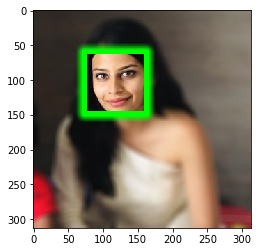

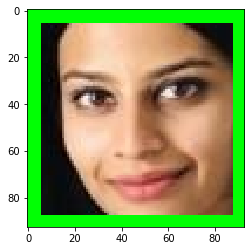


 The quality of the above image is bad as the face does not cover 50 percent of image 
[{'faceRectangle': {'top': 70, 'left': 80, 'width': 80, 'height': 80}, 'faceAttributes': {'smile': 1.0, 'headPose': {'pitch': -11.5, 'roll': -7.2, 'yaw': -13.9}, 'gender': 'female', 'age': 27.0, 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.62}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': True, 'lipMakeup': True}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.02, 'invisible': False, 'hairColor': [{'color': 'black', 'confidence': 1.0}, {'color': 'other', 'confidence': 0.69}, {'color': 'gray', 'confidence': 0.59}, {'c

In [3]:
#This method uses Azure Face API and detects teeth

def get_face_attributes():
       
# set to your own subscription key value
    subscription_key = 'debda447744f4962be9c739dff35d2f2'
    assert subscription_key

# replace <My Endpoint String> with the string from your endpoint URL
    face_api_url = 'https://g2496.cognitiveservices.azure.com/face/v1.0/detect'


    image_url = load_image()                                                       #loads the image url and calls load                                       
    detect_face_and_check_quality()                                                #function call              
    with urllib.request.urlopen(image_url) as url1:                                #open image url and convert it into byte format
        f1 = io.BytesIO(url1.read())

    img2 = Image.open(f1)                                                          #opens the image byte format


    headers = {'Ocp-Apim-Subscription-Key': subscription_key}

    params = {                                                                      #API parameters
        'returnFaceId': 'false',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'smile,age,gender,headPose,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    }

    response = requests.post(face_api_url, params=params,                                    #stores the response of parameters
                             headers=headers, json={"url": image_url})
    features= response.json()                                                                 #converts the response into json format
    print(features)
    

    smile=features[0]['faceAttributes']['smile']                                               #detects teeth in an image
    if smile == 1.0:
        print("teeth is shown in the image")
    else:
        print("no teeth is shown in the image")

    
    
    
get_face_attributes()                                                                            #function call
